In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pickle
import json
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset1=pd.read_excel("/content/drive/MyDrive/Dissertation/ncd_global_prevalence_dataset_1.xlsx")
dataset2=pd.read_csv("/content/drive/MyDrive/Dissertation/diabetes_dataset_2.csv")
dataset3=pd.read_csv("/content/drive/MyDrive/Dissertation/mortality_data_3.csv")

In [ ]:
# Converting all the string values in the datasets to lowercase
dataset1 = dataset1.applymap(lambda s: s.lower() if isinstance(s, str) else s)
dataset2 = dataset2.applymap(lambda s: s.lower() if isinstance(s, str) else s)
dataset3 = dataset3.applymap(lambda s: s.lower() if isinstance(s, str) else s)

In [ ]:
dataset1.head(2)

,Country/Region/World,ISO,Sex,Year,Age-standardized prevalence of diabetes (18+ years),Age-standardized prevalence of diabetes (18+ years) lower 95% uncertainty interval,Age-standardized prevalence of diabetes (18+ years) upper 95% uncertainty interval,Age-standardized proportion of people with diabetes who were treated (30+ years),Age-standardized proportion of people with diabetes who were treated (30+ years) lower 95% uncertainty interval,Age-standardized proportion of people with diabetes who were treated (30+ years) upper 95% uncertainty interval,Crude prevalence of diabetes (18+ years),Crude prevalence of diabetes (18+ years) lower 95% uncertainty interval,Crude prevalence of diabetes (18+ years) upper 95% uncertainty interval,Crude proportion of people with diabetes who were treated (30+ years),Crude proportion of people with diabetes who were treated (30+ years) lower 95% uncertainty interval,Crude proportion of people with diabetes who were treated (30+ years) upper 95% uncertainty interval
0,afghanistan,afg,men,1990,0.102185,0.043214,0.185308,0.234837,0.084755,0.464630,0.076613,0.030809,0.146035,0.226878,0.080133,0.453609
1,afghanistan,afg,men,1991,0.104102,0.044941,0.189061,0.234642,0.087199,0.457768,0.077757,0.031912,0.148884,0.226938,0.082807,0.448680


In [ ]:
dataset2.head(2)

,Target,Genetic Markers,Autoantibodies,Family History,Environmental Factors,Insulin Levels,Age,BMI,Physical Activity,Dietary Habits,...,Pulmonary Function,Cystic Fibrosis Diagnosis,Steroid Use History,Genetic Testing,Neurological Assessments,Liver Function Tests,Digestive Enzyme Levels,Urine Test,Birth Weight,Early Onset Symptoms
0,steroid-induced diabetes,positive,negative,no,present,40,44,38,high,healthy,...,76,no,no,positive,3,normal,56,ketones present,2629,no
1,neonatal diabetes mellitus (ndm),positive,negative,no,present,13,1,17,high,healthy,...,60,yes,no,negative,1,normal,28,glucose present,1881,yes


In [ ]:
dataset3.head(2)

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,afghanistan,afg,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,afghanistan,afg,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092


# DATASET 1 PREPROCESSING - NCD TEMPORAL DATA


In [ ]:
df1_processed = dataset1[['Country/Region/World', 'Sex', 'Year', 'Age-standardized prevalence of diabetes (18+ years)']].copy()

df1_processed = df1_processed.rename(columns={
    'Country/Region/World': 'country',
    'Sex': 'gender',
    'Year': 'year',
    'Age-standardized prevalence of diabetes (18+ years)': 'prevalence'
})

df1_processed['country'] = df1_processed['country'].replace({
    'timor-leste': 'timor',
    'turkiye': 'turkey',
    'dr congo': 'democratic republic of congo',
    'viet nam': 'vietnam',
})

df1_processed.to_csv('/content/drive/MyDrive/Dissertation/processed_ncd_data.csv', index=False)
df1_processed.head()

,country,gender,year,prevalence
0,afghanistan,men,1990,0.102185
1,afghanistan,men,1991,0.104102
2,afghanistan,men,1992,0.106136
3,afghanistan,men,1993,0.108260
4,afghanistan,men,1994,0.110458


In [ ]:
# Checking outliers
Q1 = df1_processed['prevalence'].quantile(0.25)
Q3 = df1_processed['prevalence'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df1_processed[
    (df1_processed['prevalence'] < lower_bound) |
    (df1_processed['prevalence'] > upper_bound)
]

print(outliers[['country', 'year', 'gender', 'prevalence']].sort_values(by='prevalence'))

                              country  year gender  prevalence
10108                    saudi arabia  2000    men    0.246075
4037   federated states of micronesia  2001    men    0.246186
199                    american samoa  1991    men    0.246245
7326                 marshall islands  1990    men    0.246339
5639                             iraq  2019    men    0.246349
...                               ...   ...    ...         ...
7374                 marshall islands  2005  women    0.366804
7378                 marshall islands  2009  women    0.367708
7375                 marshall islands  2006  women    0.368385
7377                 marshall islands  2008  women    0.368868
7376                 marshall islands  2007  women    0.369129

[586 rows x 4 columns]


In [ ]:
df1_processed[df1_processed['country']=='saudi arabia'][:33]

,country,gender,year,prevalence
10098,saudi arabia,men,1990,0.190094
10099,saudi arabia,men,1991,0.196685
10100,saudi arabia,men,1992,0.203306
10101,saudi arabia,men,1993,0.209817
10102,saudi arabia,men,1994,0.216177
10103,saudi arabia,men,1995,0.222265
10104,saudi arabia,men,1996,0.228032
10105,saudi arabia,men,1997,0.233383
10106,saudi arabia,men,1998,0.238208
10107,saudi arabia,men,1999,0.242438


Checked outliers and cross checked it with the actual data but, these outliers doesn't seem like outliers in the raw data, so keeping them in the dataset.

In [ ]:
def detect_outliers_iqr(group, column='prevalence'):
# Detecting outliers for a country-gender pair
    Q1 = group[column].quantile(0.25)
    Q3 = group[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[(group[column] < lower_bound) | (group[column] > upper_bound)]

outliers_grouped = (df1_processed.groupby(['country', 'gender'], group_keys=False).apply(detect_outliers_iqr))

print('Total outliers found (grouped by country & gender): ', outliers_grouped.shape[0])
outliers_grouped.head(8)

Total outliers found (grouped by country & gender):  239


,country,gender,year,prevalence
297,andorra,women,1990,0.047457
298,andorra,women,1991,0.048623
299,andorra,women,1992,0.049800
300,andorra,women,1993,0.050956
660,austria,men,1990,0.035486
661,austria,men,1991,0.037881
662,austria,men,1992,0.040245
663,austria,men,1993,0.042557


In [ ]:
df1_processed[df1_processed['country']=='andorra'][33:]

,country,gender,year,prevalence
297,andorra,women,1990,0.047457
298,andorra,women,1991,0.048623
299,andorra,women,1992,0.049800
300,andorra,women,1993,0.050956
301,andorra,women,1994,0.052069
302,andorra,women,1995,0.053141
303,andorra,women,1996,0.054132
304,andorra,women,1997,0.055020
305,andorra,women,1998,0.055787
306,andorra,women,1999,0.056506


Again cross checked with the actual data and found that the mentioned outliers are not really outliers.

# DATASET 2 PREPROCESSING - KAGGLE MULTI-CLASS DATA


In [ ]:
dataset2.columns

Index(['Target', 'Genetic Markers', 'Autoantibodies', 'Family History',
       'Environmental Factors', 'Insulin Levels', 'Age', 'BMI',
       'Physical Activity', 'Dietary Habits', 'Blood Pressure',
       'Cholesterol Levels', 'Waist Circumference', 'Blood Glucose Levels',
       'Ethnicity', 'Socioeconomic Factors', 'Smoking Status',
       'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS',
       'Previous Gestational Diabetes', 'Pregnancy History',
       'Weight Gain During Pregnancy', 'Pancreatic Health',
       'Pulmonary Function', 'Cystic Fibrosis Diagnosis',
       'Steroid Use History', 'Genetic Testing', 'Neurological Assessments',
       'Liver Function Tests', 'Digestive Enzyme Levels', 'Urine Test',
       'Birth Weight', 'Early Onset Symptoms'],
      dtype='object')

In [ ]:
X = dataset2.drop(columns=['Target'], errors='ignore')
y = dataset2['Target']

In [ ]:
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

X_processed = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

df2_processed = X_processed.copy()
df2_processed['diabetes_type'] = y
df2_processed.to_csv('/content/drive/MyDrive/Dissertation/clean_diabetes_data.csv', index=False)

with open('/content/drive/MyDrive/Dissertation/clean_label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

with open('/content/drive/MyDrive/Dissertation/clean_feature_names.pkl', 'wb') as f:
    pickle.dump(list(X_processed.columns), f)

preprocessing_info = {
    'original_shape': dataset2.shape,
    'processed_shape': X_processed.shape,
    'categorical_features': categorical_cols,
    'numerical_features': numerical_cols,
    'target_classes': le.classes_.tolist()
}

with open('/content/drive/MyDrive/Dissertation/clean_preprocessing_info.json', 'w') as f:
    json.dump(preprocessing_info, f, indent=2)


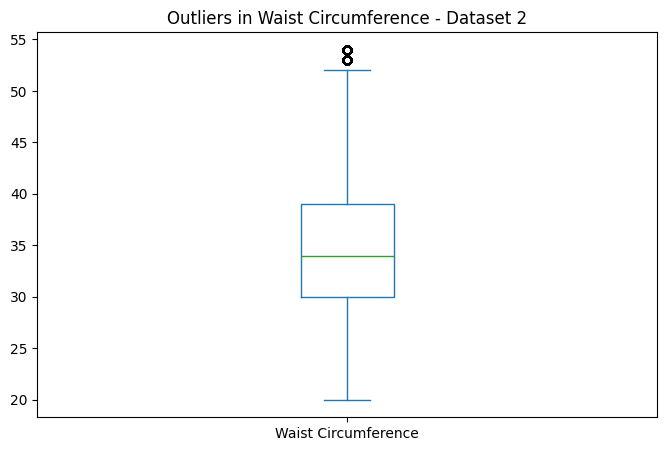

In [ ]:
df2_processed['Waist Circumference'].plot(kind='box', figsize=(8,5))
plt.title("Outliers in Waist Circumference - Dataset 2")
plt.show()


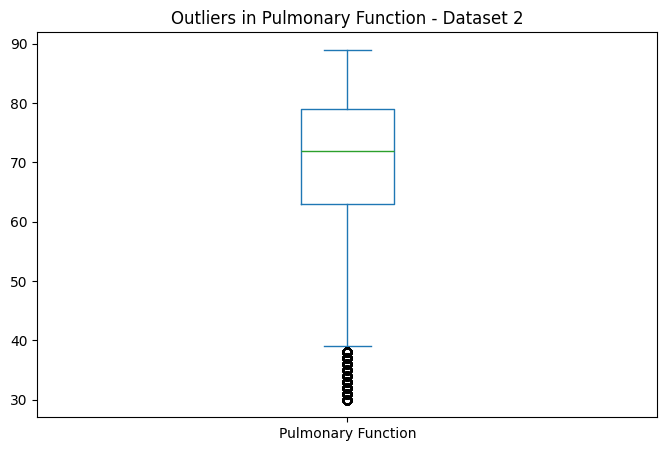

In [ ]:
df2_processed['Pulmonary Function'].plot(kind='box', figsize=(8,5))
plt.title("Outliers in Pulmonary Function - Dataset 2")
plt.show()


In [ ]:
columns_to_check = ['Waist Circumference', 'Pulmonary Function']

outliers_dict = {}

for col in columns_to_check:
    Q1 = df2_processed[col].quantile(0.25)
    Q3 = df2_processed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df2_processed[(df2_processed[col] < lower_bound) | (df2_processed[col] > upper_bound)]
    outliers_dict[col] = outliers[[col]]

    print('\nOutliers in ',col,':')
    print(outliers[[col]])


Outliers in  Waist Circumference :
       Waist Circumference
235                     53
299                     54
322                     54
536                     53
551                     54
...                    ...
69441                   54
69504                   54
69636                   54
69674                   53
69812                   53

[522 rows x 1 columns]

Outliers in  Pulmonary Function :
       Pulmonary Function
120                    30
279                    38
325                    37
369                    34
384                    31
...                   ...
69532                  37
69660                  32
69664                  34
69873                  38
69904                  38

[1206 rows x 1 columns]


In [ ]:
df2_processed['Waist Circumference'].sort_values().unique()

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54])

In [ ]:
df2_processed['Pulmonary Function'].sort_values().unique()

array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
       64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
       81, 82, 83, 84, 85, 86, 87, 88, 89])

Checked the actual range of both the columns, seems like the outliers are of use in this dataset as they are just the extreme values of the features.

# DATASET 3 PREPROCESSING - MORTALITY VALIDATION DATA


In [ ]:
df3_processed = dataset3.copy()

mortality_cols = [col for col in ['Diabetes Mellitus', 'Cardiovascular Diseases', 'Chronic Kidney Disease'] if col in df3_processed.columns]

if 'Country/Territory' in df3_processed.columns:
    df3_processed['country'] = df3_processed['Country/Territory'].str.strip()

if 'Year' in df3_processed.columns:
    df3_processed['year'] = df3_processed['Year'].astype(int)

# Validation dataset
validation_cols = ['country', 'year'] + mortality_cols
if 'Code' in df3_processed.columns:
    validation_cols.insert(1, 'Code')

df3_validation = df3_processed[validation_cols].dropna(subset=mortality_cols, how='all')

# Making the country names consistent across datasets
df3_validation['country'] = df3_validation['country'].replace({
    'brunei': 'brunei darussalam',
    'guinea-bissau': 'guinea bissau',
    'united states': 'united states of america',
    'syria': 'syrian arab republic',
    'micronesia': 'federated states of micronesia',
    'palestine': 'state of palestine',
    'laos': 'lao pdr',
    'cape verde': 'cabo verde',
    'russia': 'russian federation'
})

df3_validation.to_csv('/content/drive/MyDrive/Dissertation/processed_mortality_data.csv', index=False)

print("Processed mortality validation data saved:", df3_validation.shape)


Processed mortality validation data saved: (6120, 6)


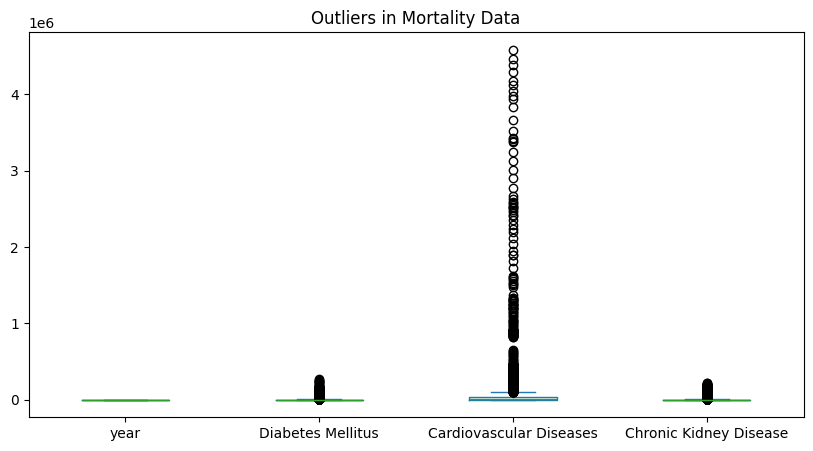

In [ ]:
df3_validation.plot(kind='box', figsize=(10,5))
plt.title("Outliers in Mortality Data")
plt.show()

In [ ]:
columns_to_check = ['Diabetes Mellitus', 'Cardiovascular Diseases', 'Chronic Kidney Disease']

outliers_dict = {}

for col in columns_to_check:
    Q1 = df3_validation[col].quantile(0.25)
    Q3 = df3_validation[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df3_validation[(df3_validation[col] < lower_bound) | (df3_validation[col] > upper_bound)]
    outliers_dict[col] = outliers[['country', 'year', col]]

    print('\nOutliers in ',col)
    print(outliers[['country', 'year', col]])



Outliers in  Diabetes Mellitus
        country  year  Diabetes Mellitus
210   argentina  1990               7096
211   argentina  1991               7345
212   argentina  1992               7741
213   argentina  1993               8026
214   argentina  1994               8190
...         ...   ...                ...
6025    vietnam  2012              22128
6026    vietnam  2013              23104
6027    vietnam  2017              27285
6028    vietnam  2018              28358
6029    vietnam  2019              29391

[872 rows x 3 columns]

Outliers in  Cardiovascular Diseases
         country  year  Cardiovascular Diseases
420   bangladesh  2007                   229986
421   bangladesh  2008                   234002
422   bangladesh  2009                   242016
423   bangladesh  2010                   252054
424   bangladesh  2011                   243361
...          ...   ...                      ...
6025     vietnam  2012                   215500
6026     vietnam  2013        

In [ ]:
df3_validation[df3_validation['country']=='algeria'][:33]

,country,Code,year,Diabetes Mellitus,Cardiovascular Diseases,Chronic Kidney Disease
60,algeria,dza,1990,1743,53488,3559
61,algeria,dza,1991,1787,54722,3640
62,algeria,dza,1992,1813,56107,3687
63,algeria,dza,1993,1840,57522,3741
64,algeria,dza,1994,1873,59055,3806
65,algeria,dza,1995,1894,60182,3856
66,algeria,dza,1996,1917,61130,3906
67,algeria,dza,1997,1933,62011,3937
68,algeria,dza,1998,1941,62637,3962
69,algeria,dza,1999,1994,64123,4060


Looks like all these said outliers are useful in the analysis, so keeping the outliers in all the three datasets.

# Cross Dataset Integration Analysis After Preprocessing

In [ ]:
def check_alignment(df1, df2):
    if 'year' in df1.columns and 'year' in df2.columns:
        years1, years2 = set(df1['year']), set(df2['year'])
        overlap_years = years1 & years2
        print("TEMPORAL ALIGNMENT")
        print('Year overlap: ', min(overlap_years), '–', max(overlap_years), '(', len(overlap_years), 'years)\n')

    if 'country' in df1.columns and 'country' in df2.columns:
        countries1, countries2 = set(df1['country']), set(df2['country'])
        overlap_countries = countries1 & countries2
        missing_in_df2 = countries1 - countries2
        missing_in_df1 = countries2 - countries1

        print("GEOGRAPHIC ALIGNMENT")
        print('Country overlap: ', len(overlap_countries), 'countries')
        print('Countries in NCD only: ', len(missing_in_df2), '-', list(missing_in_df2))
        print('Countries in Mortality only: ', len(missing_in_df1), '-', list(missing_in_df1))

check_alignment(df1_processed, df3_validation)

TEMPORAL ALIGNMENT
Year overlap:  1990 – 2019 ( 30 years)

GEOGRAPHIC ALIGNMENT
Country overlap:  199 countries
Countries in NCD only:  1 - ['french polynesia']
Countries in Mortality only:  5 - ['northern mariana islands', 'united states virgin islands', 'san marino', 'monaco', 'guam']
